In [1]:
import pandas as pd
data = pd.read_csv('/home/ayarkhan01/Desktop/Projects/stock_data_feature_engineered.csv')

In [6]:
data_numeric = data.drop('Date', axis=1)

In [7]:
correlation_matrix = data_numeric.corr()

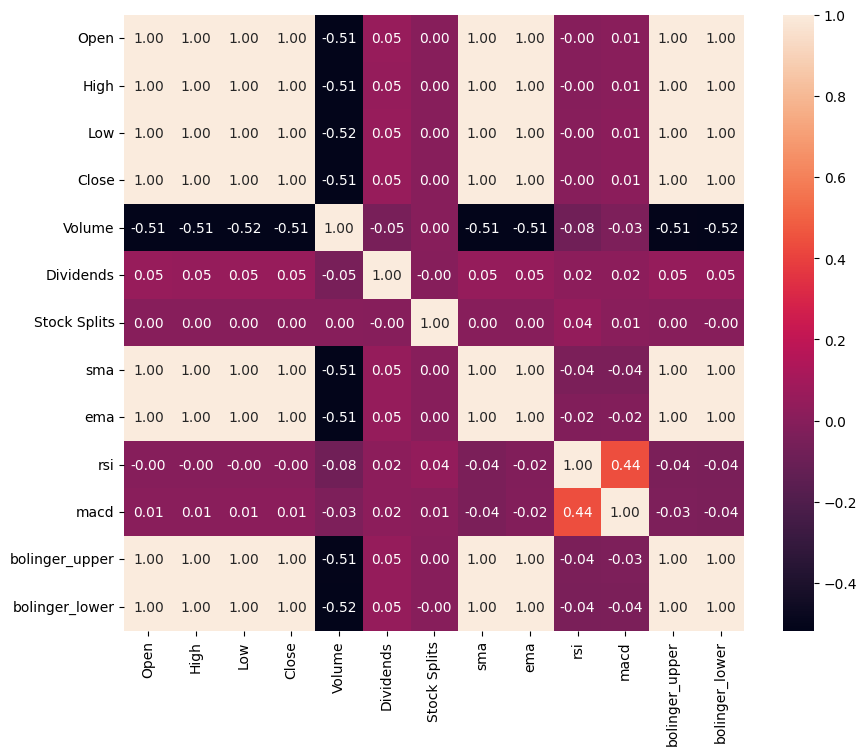

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [9]:
correlation_matrix

,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma,ema,rsi,macd,bolinger_upper,bolinger_lower
Open,1.000000,0.999899,0.999879,0.999743,-0.513444,0.052154,0.002772,0.998116,0.999293,-0.004540,0.007734,0.997574,0.997251
High,0.999899,1.000000,0.999857,0.999879,-0.512239,0.051500,0.003103,0.998199,0.999338,-0.004769,0.008697,0.997752,0.997226
Low,0.999879,0.999857,1.000000,0.999883,-0.515202,0.051832,0.002742,0.997875,0.999148,-0.001200,0.011700,0.997213,0.997147
Close,0.999743,0.999879,0.999883,1.000000,-0.513772,0.051783,0.003058,0.997917,0.999148,-0.001374,0.012510,0.997378,0.997048
Volume,-0.513444,-0.512239,-0.515202,-0.513772,1.000000,-0.051601,0.002540,-0.513640,-0.512298,-0.082904,-0.033088,-0.509781,-0.517272
Dividends,0.052154,0.051500,0.051832,0.051783,-0.051601,1.000000,-0.002599,0.049723,0.051094,0.018036,0.020446,0.050230,0.049073
Stock Splits,0.002772,0.003103,0.002742,0.003058,0.002540,-0.002599,1.000000,0.000946,0.001821,0.040279,0.005729,0.001881,-0.000121
sma,0.998116,0.998199,0.997875,0.997917,-0.513640,0.049723,0.000946,1.000000,0.999617,-0.042465,-0.037650,0.999390,0.999209
ema,0.999293,0.999338,0.999148,0.999148,-0.512298,0.051094,0.001821,0.999617,1.000000,-0.023944,-0.019381,0.999043,0.998786
rsi,-0.004540,-0.004769,-0.001200,-0.001374,-0.082904,0.018036,0.040279,-0.042465,-0.023944,1.000000,0.442085,-0.041392,-0.043623


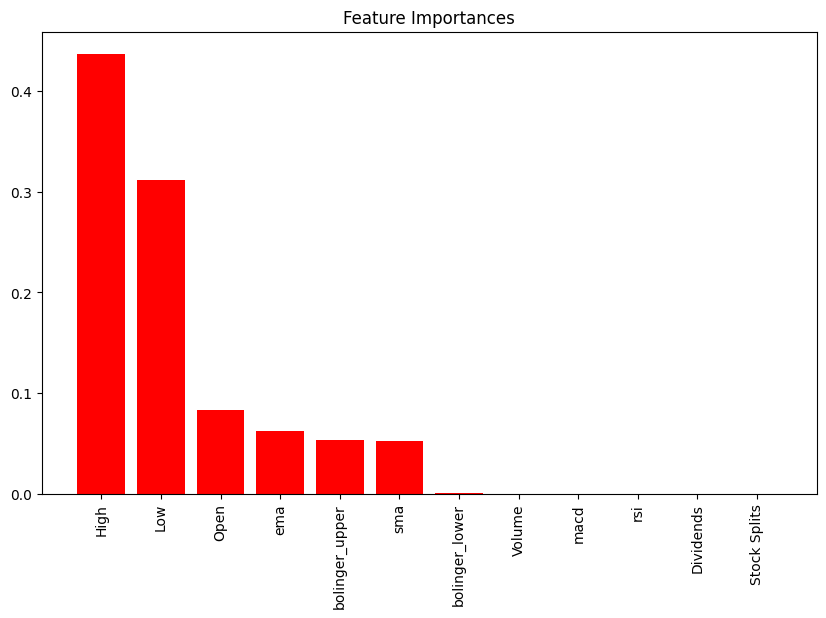

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame and 'Close' is the target variable
X = data_numeric.drop(['Close'], axis=1)  # Features
y = data_numeric['Close']  # Target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Getting feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualizing the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [11]:
import pandas as pd

# Assuming `importances` is the array of feature importances from your model
# and `X_train.columns` are the feature names
features = X_train.columns
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importances_df)


           Feature    Importance
1             High  4.372754e-01
2              Low  3.113359e-01
0             Open  8.334010e-02
7              ema  6.190853e-02
10  bolinger_upper  5.288020e-02
6              sma  5.261621e-02
11  bolinger_lower  6.056307e-04
3           Volume  1.526455e-05
9             macd  1.173104e-05
8              rsi  1.086111e-05
4        Dividends  1.782596e-07
5     Stock Splits  5.212007e-09


In [12]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma,ema,rsi,macd,bolinger_upper,bolinger_lower
0,2010-01-04 00:00:00-05:00,6.453206,6.485558,6.421458,6.470742,493729600,0.0,0.0,NaN,6.470742,NaN,0.000000,NaN,NaN
1,2010-01-05 00:00:00-05:00,6.488580,6.518514,6.447762,6.481928,601904800,0.0,0.0,NaN,6.472463,NaN,0.000324,NaN,NaN
2,2010-01-06 00:00:00-05:00,6.481928,6.507628,6.372172,6.378824,552160000,0.0,0.0,NaN,6.458057,NaN,-0.002491,NaN,NaN
3,2010-01-07 00:00:00-05:00,6.402409,6.409968,6.320772,6.367033,477131200,0.0,0.0,NaN,6.444053,NaN,-0.004343,NaN,NaN
4,2010-01-08 00:00:00-05:00,6.358566,6.409967,6.321075,6.409362,447610800,0.0,0.0,NaN,6.438716,NaN,-0.003917,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3376,2023-06-02 00:00:00-04:00,180.317907,181.064957,178.554865,180.238220,61945900,0.0,0.0,173.623037,175.279607,75.119967,0.190749,179.032684,168.213390
3377,2023-06-05 00:00:00-04:00,181.911617,184.222483,177.339661,178.873611,121946500,0.0,0.0,173.934295,175.832531,71.396000,0.165756,179.804584,168.064006
3378,2023-06-06 00:00:00-04:00,179.262086,179.411490,176.732069,178.505081,64848400,0.0,0.0,174.230608,176.243693,69.921917,0.117529,180.403301,168.057914
3379,2023-06-07 00:00:00-04:00,177.738101,180.497209,176.622511,177.120544,61944600,0.0,0.0,174.543734,176.378593,63.723939,0.028719,180.630849,168.456619


In [13]:
# List of columns to drop
columns_to_drop = ['Open', 'macd', 'Dividends', 'Stock Splits']

# Dropping the columns from the DataFrame
data = data.drop(columns=columns_to_drop)

# Display the first few rows of the updated DataFrame to confirm changes
print(data.head())


                        Date      High       Low     Close     Volume  sma  \
0  2010-01-04 00:00:00-05:00  6.485558  6.421458  6.470742  493729600  NaN   
1  2010-01-05 00:00:00-05:00  6.518514  6.447762  6.481928  601904800  NaN   
2  2010-01-06 00:00:00-05:00  6.507628  6.372172  6.378824  552160000  NaN   
3  2010-01-07 00:00:00-05:00  6.409968  6.320772  6.367033  477131200  NaN   
4  2010-01-08 00:00:00-05:00  6.409967  6.321075  6.409362  447610800  NaN   

        ema  rsi  bolinger_upper  bolinger_lower  
0  6.470742  NaN             NaN             NaN  
1  6.472463  NaN             NaN             NaN  
2  6.458057  NaN             NaN             NaN  
3  6.444053  NaN             NaN             NaN  
4  6.438716  NaN             NaN             NaN  


In [14]:
data.to_csv('stock_data_final.csv', index=False)